<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/process/Separators.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Separators
#@markdown Introduction to oil and gas separators
%%capture
!pip install neqsim==2.5.35
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

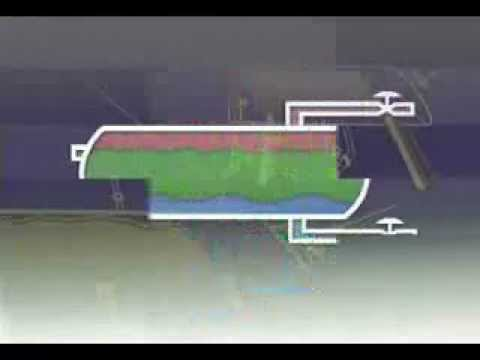

In [4]:
#@title  Oil and gas separator  design
#@markdown Introduction to oil and gas separator design
from IPython.display import YouTubeVideo
YouTubeVideo('XtOvCicplOE', width=600, height=400)

In [5]:
#@title  Separation of a well stream
#@markdown A well stream typically contains gas, oil and water.
#@markdown in NeqSim a well stream can be made in a simple way by using pre defined well stream types. In this example we use a typicall light oil.

from neqsim.thermo import fluid, TPflash
from neqsim.thermo import fluid, addOilFractions, printFrame, dataFrame, fluidcreator,createfluid,createfluid2, TPflash, phaseenvelope

inletPressure = 30.0
inletTemperature = 45.2
fluid1 = createfluid('light oil')
fluid1.setPressure(inletPressure, "bara")
fluid1.setTemperature(inletTemperature, "C")
TPflash(fluid1)
printFrame(fluid1)


                           total                 gas                 oil                     
           nitrogen   8.60585E-3          1.67173E-2          9.25641E-4      [mole fraction]
                CO2   1.72117E-2          2.63875E-2          8.52371E-3      [mole fraction]
            methane   4.47504E-1          7.95611E-1          1.17902E-1      [mole fraction]
             ethane   9.46644E-2           1.1868E-1           7.1925E-2      [mole fraction]
            propane   4.30293E-2          3.17267E-2           5.3731E-2      [mole fraction]
           i-butane   8.60585E-3          3.75379E-3             1.32E-2      [mole fraction]
           n-butane    1.0327E-2          3.54581E-3          1.67478E-2      [mole fraction]
          i-pentane   8.60585E-3           1.5203E-3          1.53147E-2      [mole fraction]
          n-pentane   8.60585E-3          1.23295E-3          1.55868E-2      [mole fraction]
           n-hexane   8.60585E-3          4.91857E-4        

#Calculation of size and weight of separation equipment
The general equation for sizing a separator or scrubber is given by the Sauder Brown equation:

$v=K_s\times(\rho_L-\rho_g)/\rho_g$

Where $\rho_g$ is the gas density $\rho_l$ the liquid density and $K_s$ is the gas load factor. v is the maximum allowable velocty of the gas in the separator. In this excercise we will use a Ks value for horizontal separators of 0.2and a L/D retio of 5.0.

For vertical scrubbers we will use a Ks factor of 0.1 and a L/D ratio of 4.0.

The separator diameter is calculated from the equation

$D=\sqrt{4.0\cdot \frac{Q_g}{\pi \cdot v \cdot F_g}}$

Where $F_g$ is the fraction of area occupied by the gas (we will use 0.8 here).

$v=\frac{g\cdot {D_p}^2 (\rho_l - \rho_g)}{18 \cdot \mu_{oil} }$

The crosssectional area neccesary to degass the oil is calculated from

For oil-water separation we use the equation

$v=\frac{A \cdot C ((\rho_w - \rho_o)}{\mu} \cdot L_c$

where v is setling velocity, A is a coefficient 0.167, C is correction factor from diagram and Lc is length correction ($0.52L^{0.2}$).
